## image STITCHER

In [ ]:
# This code will STITCH all image presen in lot

In [ ]:
# https://drive.google.com/drive/folders/1-M64d6-cWzQgiG7vxSfu-QN3EdBYw9PT?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
import os 
from google.colab.patches import cv2_imshow
import uuid   # Unique identifier


main_folder = '/content/drive/MyDrive/data_detectron/input_file'
my_folders = os.listdir(main_folder)
print(my_folders)

for folder in my_folders:
  path = main_folder +'/'+folder
  images=[]
  myList=os.listdir(path)
  print(f'total no of image detected {len(myList)}')
  for imgN in myList:
    curImg=cv2.imread(f'{path}/{imgN}')
    images.append(curImg)
  #print(len(images))
  stitcher = cv2.Stitcher.create() 
  (status,result) = stitcher.stitch(images)
  if (status == cv2.STITCHER_OK):
    print('Panorama Generated')
    cv2_imshow(result)


    IMAGES_PATH='/content/drive/MyDrive/data_detectron/output_file'
    # Naming out image path
    imgname = os.path.join(IMAGES_PATH,folder+str(uuid.uuid1())+'.png')

    # Writes out image to file 
    cv2.imwrite(imgname, result)
    print(imgname)
    print('Panorama saved')

    cv2.waitKey(1)
  else:
    print('panorama generation unsuccessful')

cv2.waitKey(0)



['lot1']
total no of image detected 2


# Install detectron2

In [ ]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 16.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=6cd85a05ba492f0df1ffd0ed7292ba13e5a075086ea396f79bf91902ac95606e
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-dvkab40u
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-dvkab40u
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# prepare data

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as mp
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2. config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog



In [ ]:
from detectron2.data. datasets import register_coco_instances
register_coco_instances("customtrain", {}, "/content/drive/MyDrive/data_detectron/json/via_region_data.json", "/content/drive/MyDrive/data_detectron/train")


In [ ]:
sample_metadata = MetadataCatalog.get("customtrain")
dataset_dicts = DatasetCatalog.get( "customtrain")

WARNING [07/27 18:32:48 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/27 18:32:48 d2.data.datasets.coco]: Loaded 1 images in COCO format from /content/drive/MyDrive/data_detectron/json/via_region_data.json
WARNING [07/27 18:32:48 d2.data.datasets.coco]: Filtered out 3 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


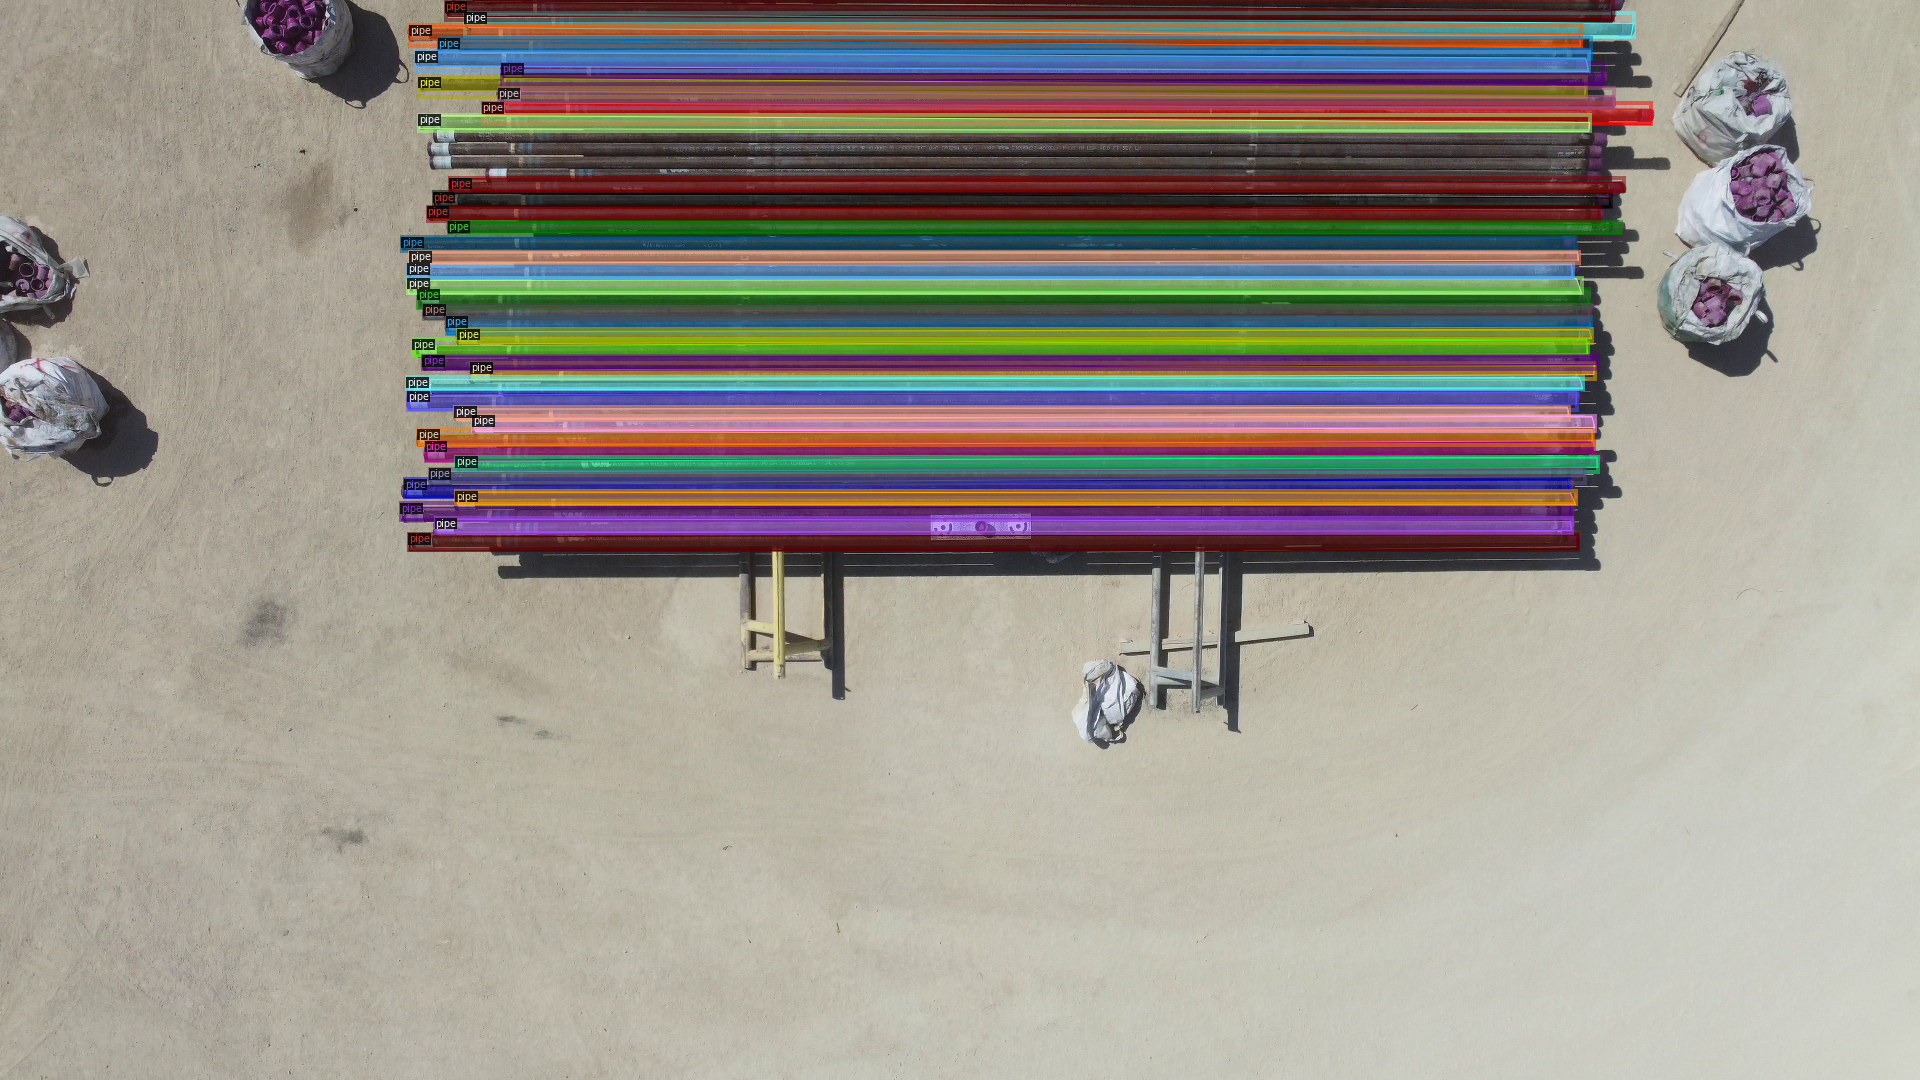

In [ ]:
import random
for d in random.sample(dataset_dicts, 1):
  img = cv2. imread(d["file_name" ])
  visualizer = Visualizer(img[:,:,::-1], metadata=sample_metadata, scale=0.5)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2. engine import DefaultTrainer
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("customtrain",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") #
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 600
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# set the testing threshold for this model
cfg.DATASETS.TEST = ("customtrain",)
predictor = DefaultPredictor(cfg)

[07/27 18:38:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:09, 18.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (15, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (56, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (56,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[07/27 18:38:31 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/27 18:38:49 d2.utils.events]:  eta: 0:04:11  iter: 19  total_loss: 5.372  loss_cls: 2.59  loss_box_reg: 0.3977  loss_mask: 0.6892  loss_rpn_cls: 0.1511  loss_rpn_loc: 1.452  time: 0.4485  data_time: 0.2357  lr: 8.1588e-05  max_mem: 1603M
[07/27 18:39:00 d2.utils.events]:  eta: 0:04:02  iter: 39  total_loss: 3.485  loss_cls: 0.9883  loss_box_reg: 0.7645  loss_mask: 0.6736  loss_rpn_cls: 0.06843  loss_rpn_loc: 0.895  time: 0.4884  data_time: 0.2142  lr: 0.00016484  max_mem: 1603M
[07/27 18:39:10 d2.utils.events]:  eta: 0:03:53  iter: 59  total_loss: 2.42  loss_cls: 0.4736  loss_box_reg: 0.7699  loss_mask: 0.6298  loss_rpn_cls: 0.03511  loss_rpn_loc: 0.5068  time: 0.4872  data_time: 0.1893  lr: 0.00024809  max_mem: 1603M
[07/27 18:39:20 d2.utils.events]:  eta: 0:03:45  iter: 79  total_loss: 2.01  loss_cls: 0.3554  loss_box_reg: 0.6606  loss_mask: 0.5353  loss_rpn_cls: 0.03367  loss_rpn_loc: 0.4306  time: 0.4928  data_time: 0.2074  lr: 0.00033134  max_mem: 1603M
[07/27 18:39:31 d2.util

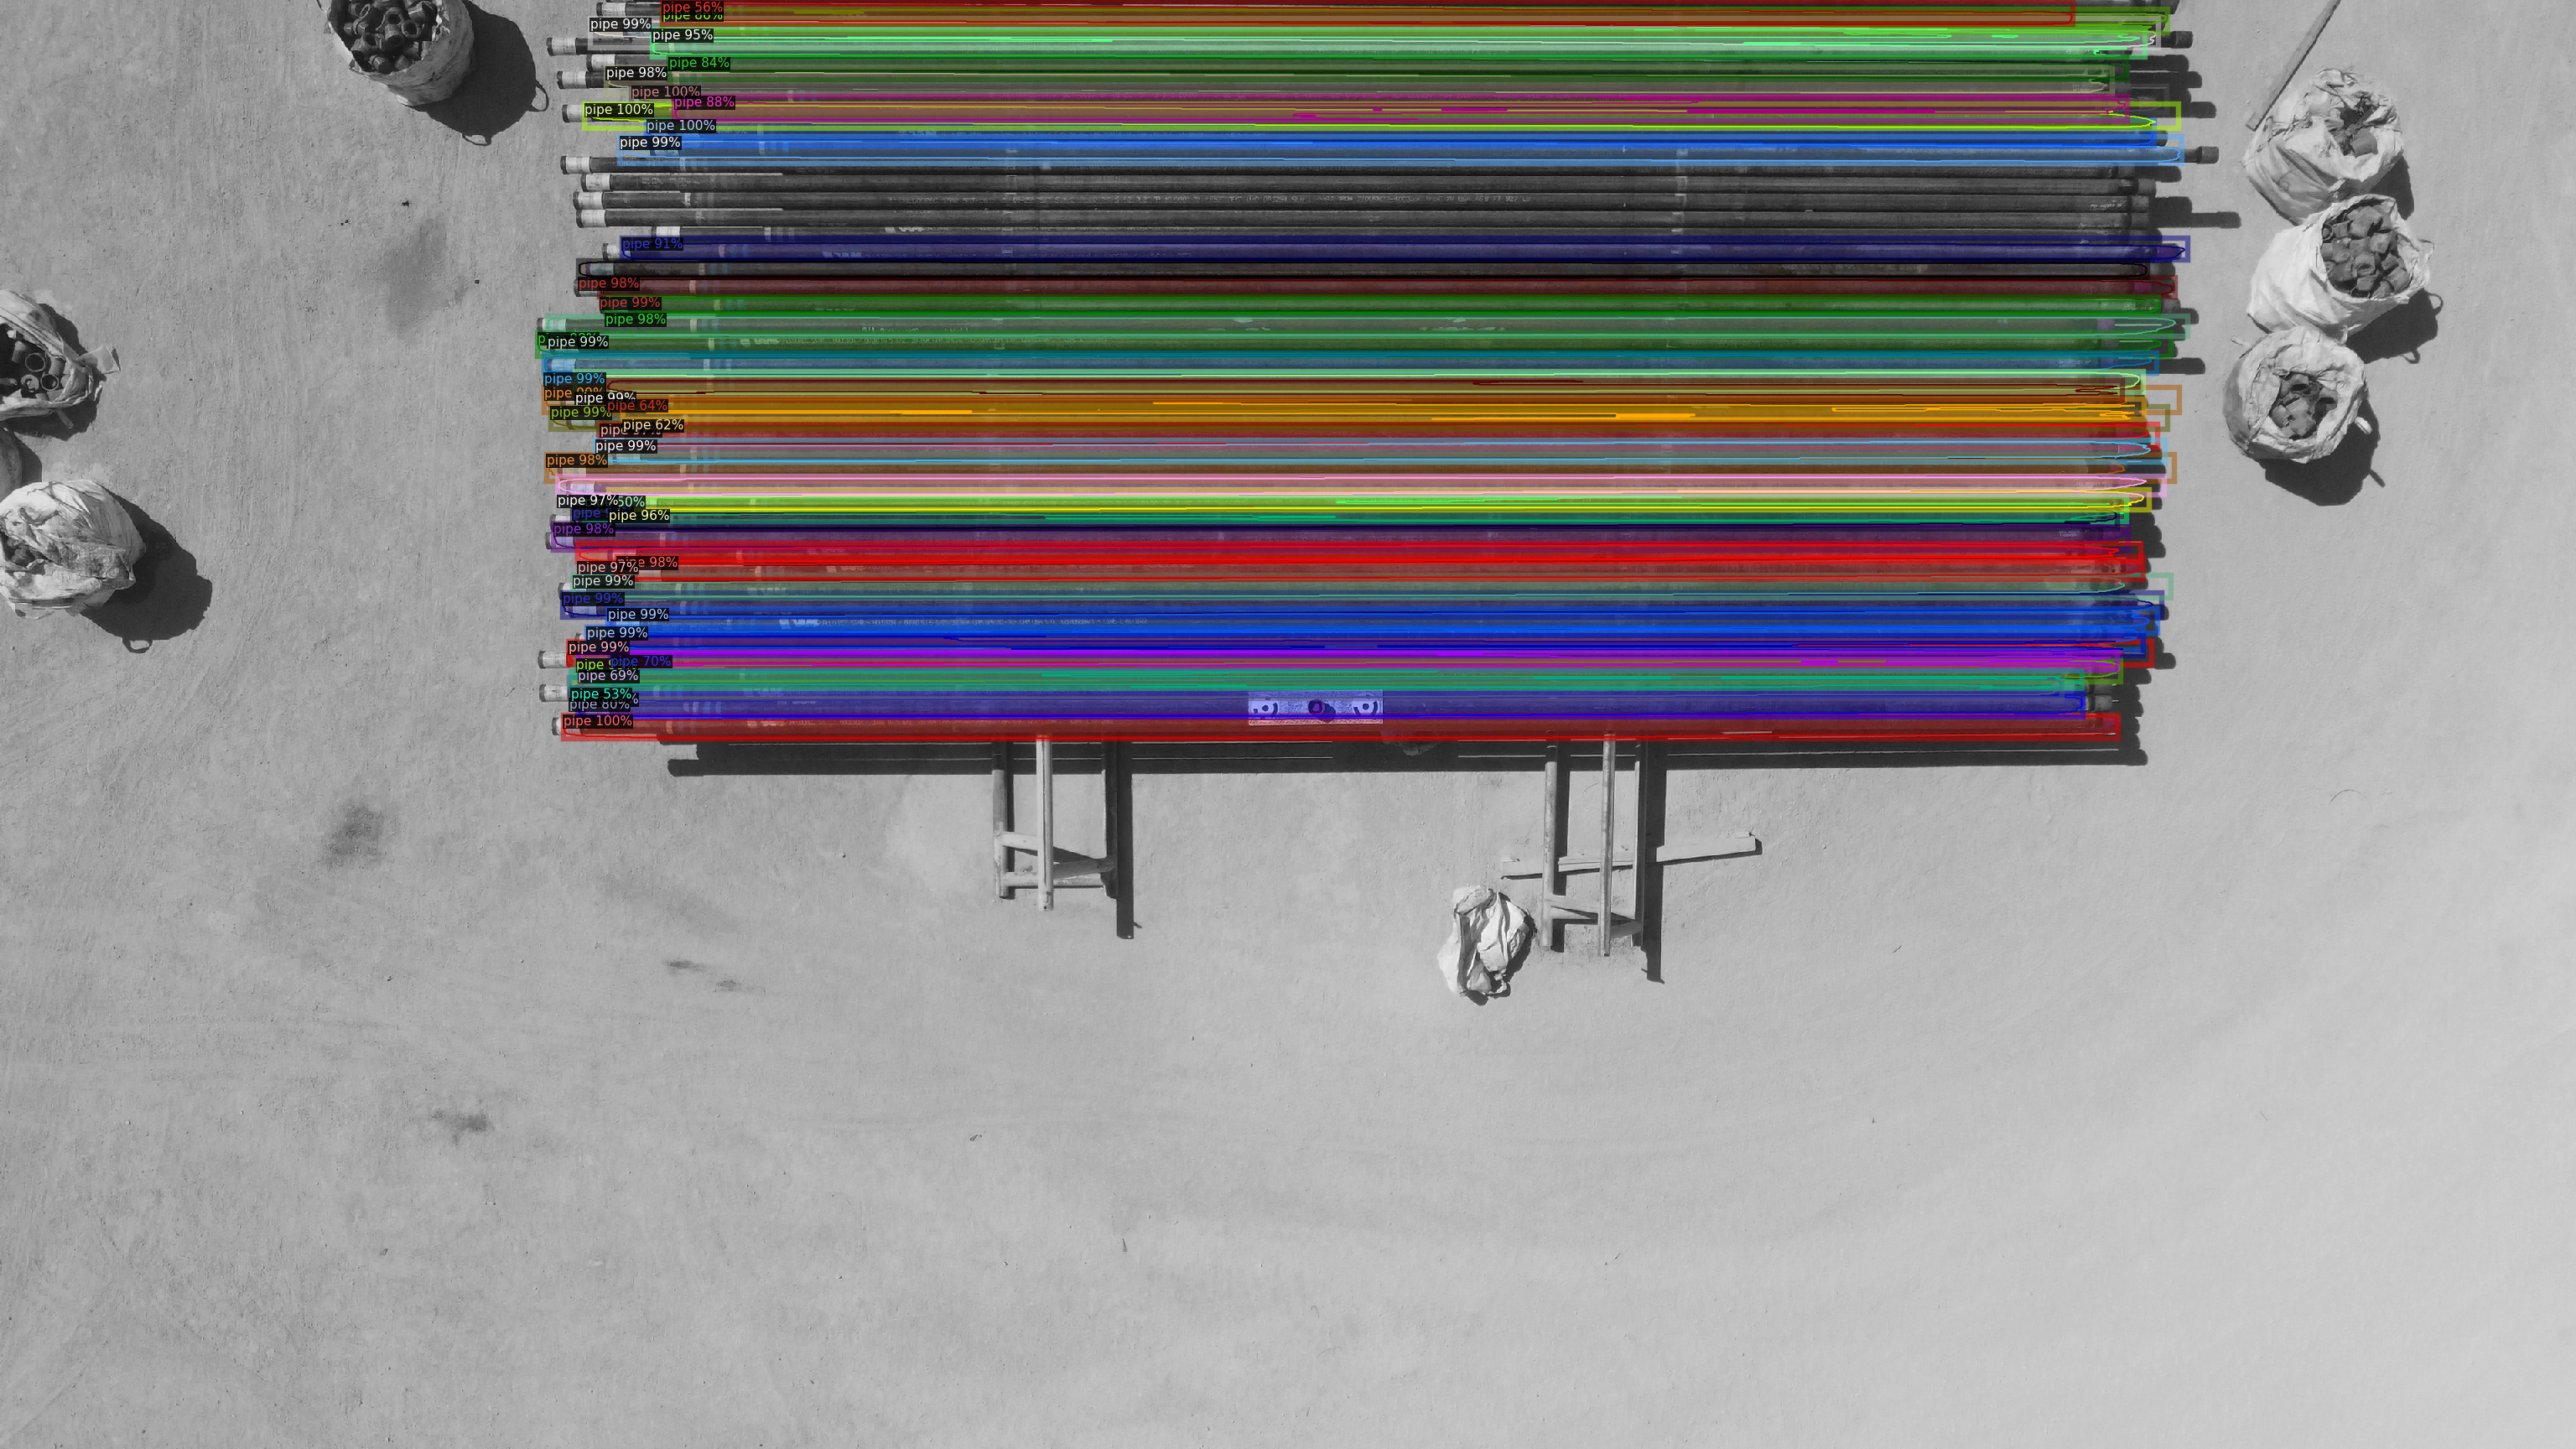

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 1):
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)

  v = Visualizer(im[:, :, ::-1],
                  metadata=sample_metadata,
                  scale=0.8,
                  instance_mode=ColorMode.IMAGE_BW # remove the colors of unsegmented pixels
  )
  v = v. draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])



In [ ]:
#outputs

A) OUTPUT OF print(instances)
 fields=[pred_boxes, scores, pred_classes, pred_masks])

Explanation: this output says me there are 4 boxes detected.

B) OUTPUT OF print(instances.pred_boxes)
Boxes(tensor([[289.3555, 17.8171, 451.1482, 347.6050],
]))

Explanation: this output says me, the coordinates of the boxes detected.
In particular, the first box (instances.pred_boxes[0]) has the top_left point with coordinates (x,y)=(289.3555, 17.8171), and the bottom_right point with coordinates (x,y)=(451.1482, 347.6050)

C) OUTPUT OF print(instances.pred_boxes[0])
Boxes(tensor([[289.3555, 17.8171, 451.1482, 347.6050]]))
Explanation: with this command, I just print the coordinates of the first box (instances.pred_boxes[0])



In [ ]:
l1=[]
for i in (outputs["instances"].pred_boxes):
  l1.append((i[2]-i[0]).cpu().numpy().item())
  #print((i[2]-i[0]).cpu().numpy())

max1 = np.max(l1)
l2=[]
for i in l1:
  #print((i/max1)*50)
  l2.append((i/max1)*50)


sum(l2)

2127.826270518914

In [ ]:
# the length of pipe in single image of a  lot is  2127.826270518914